In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/asthma_disease_data.csv")

In [4]:
print("Duplicates before:", data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicates after:", data.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [7]:
data.drop_duplicates(inplace=True)

In [6]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        missing_pct = (data[col].isnull().sum() / len(data)) * 100
        
        if data[col].dtype in ['float64', 'int64']:  # numeric
            if missing_pct < 5:
                data[col] = data[col].fillna(data[col].median())
            elif missing_pct < 30:
                data[col] = data[col].fillna(data[col].mean())
            else:
                data.drop(columns=[col], inplace=True)
        else:  # categorical
            if missing_pct < 10:
                data[col] = data[col].fillna(data[col].mode()[0])
            else:
                data[col] = data[col].fillna("Unknown")


In [8]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop("Diagnosis")

for col in numeric_cols:
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    data[col] = np.clip(data[col], Q1 - 1.5*IQR, Q3 + 1.5*IQR)


In [9]:
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [10]:
print("Shape:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())


Shape: (2392, 29)

Data types:
 PatientID                 float64
Age                       float64
Gender                    float64
Ethnicity                 float64
EducationLevel            float64
BMI                       float64
Smoking                   float64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                float64
FamilyHistoryAsthma       float64
HistoryOfAllergies        float64
Eczema                    float64
HayFever                  float64
GastroesophagealReflux    float64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                  float64
ShortnessOfBreath         float64
ChestTightness            float64
Coughing                  float64
NighttimeSymptoms         float64
ExerciseInduced           float64
Diagnosis                   int64
DoctorInCharge  

NameError: name 'plt' is not defined

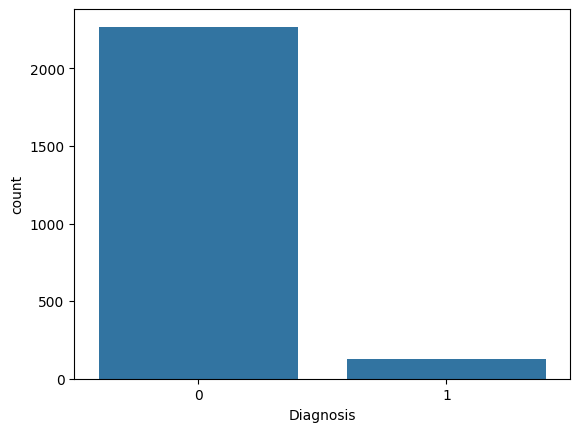

In [13]:
sns.countplot(x="Diagnosis", data=data)
plt.title("Asthma Diagnosis Distribution")
plt.show()


In [16]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

data[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()


In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


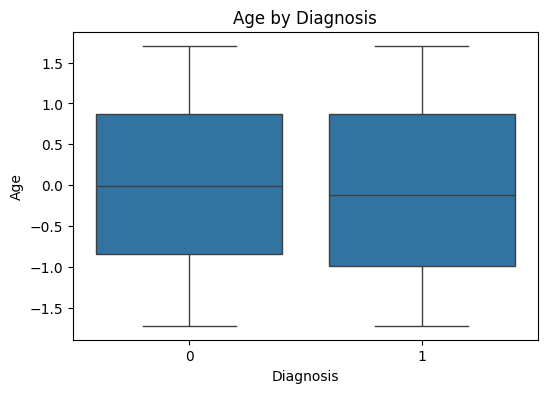

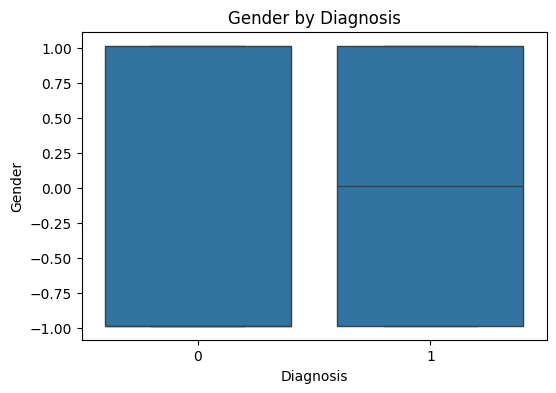

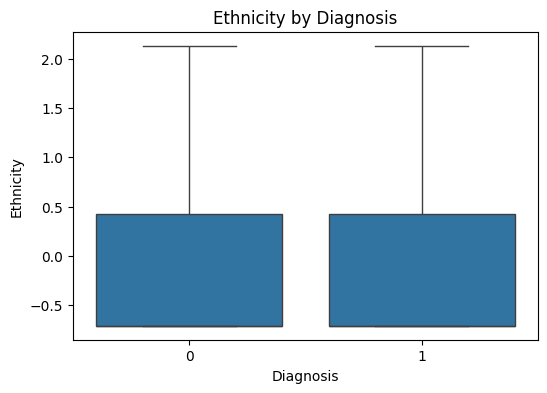

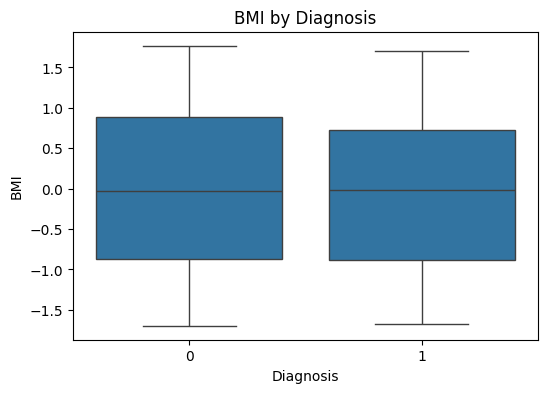

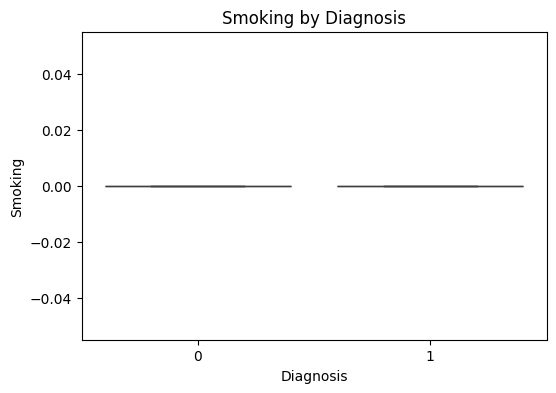

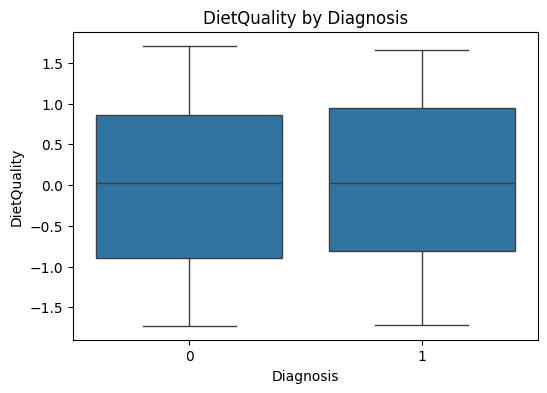

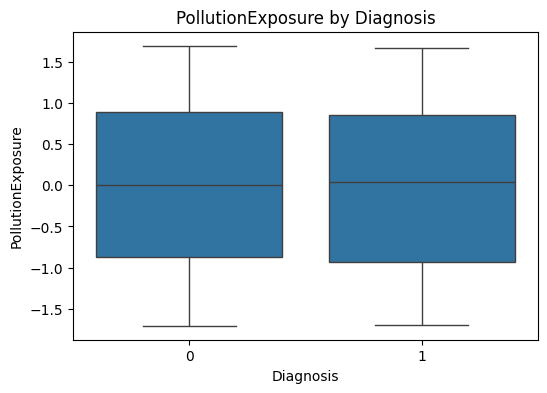

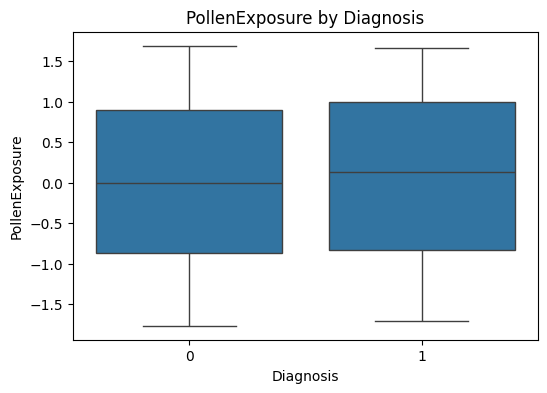

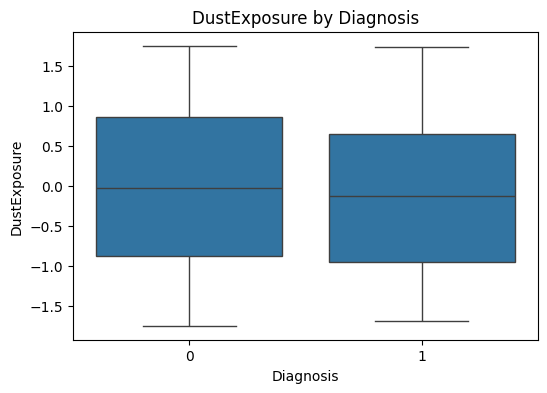

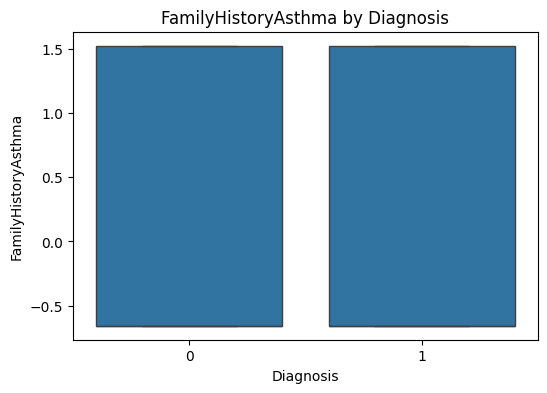

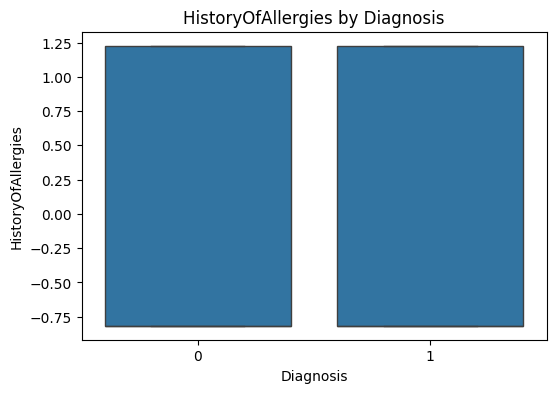

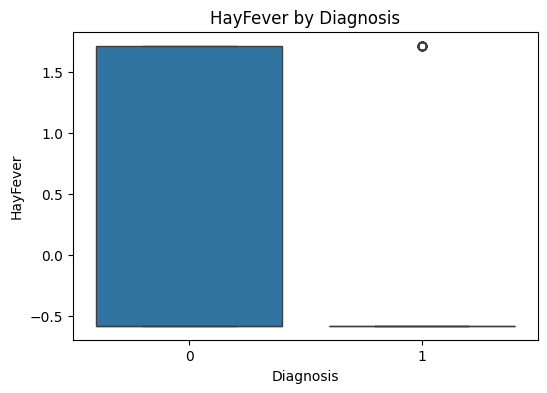

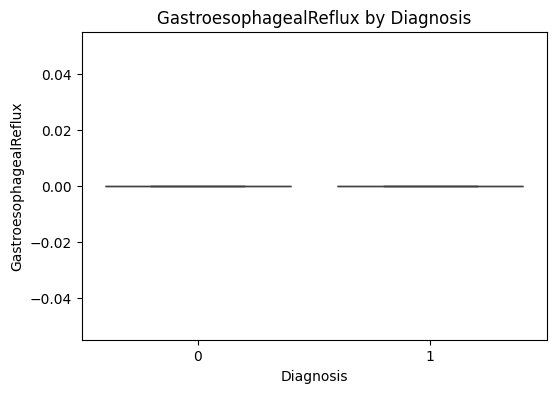

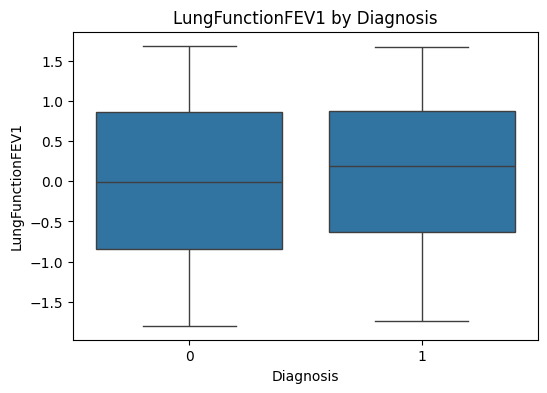

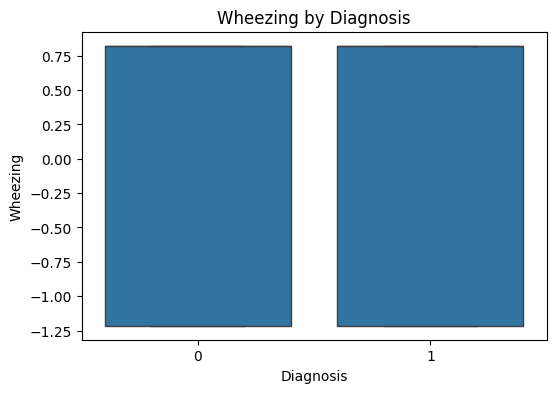

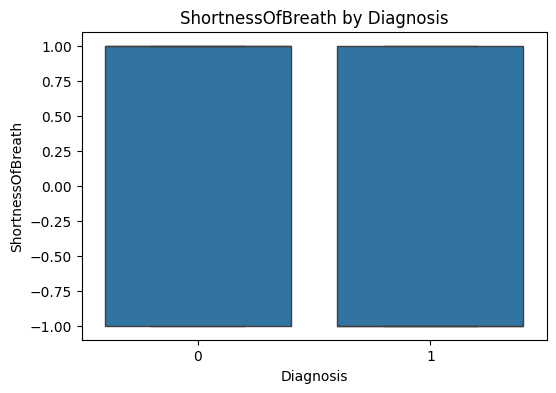

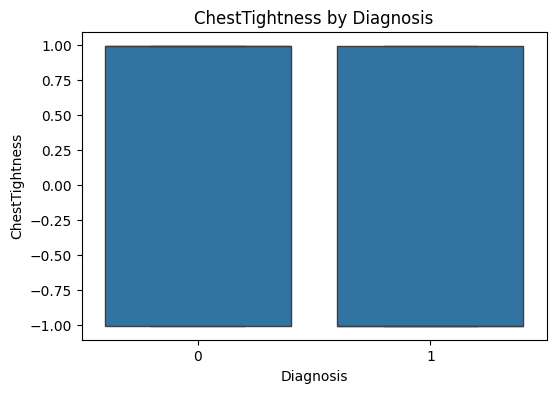

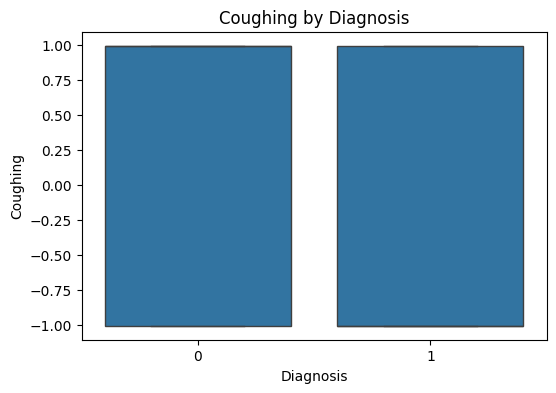

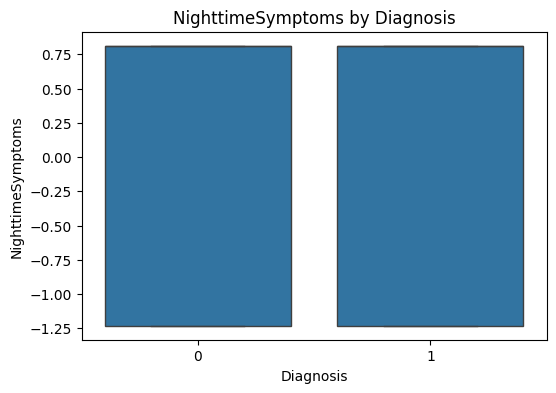

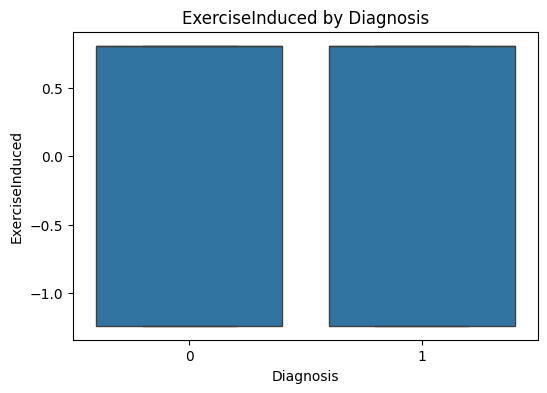

In [21]:
for col in num_cols.drop("Diagnosis", errors="ignore"):
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Diagnosis", y=col, data=data)
    plt.title(f"{col} by Diagnosis")
    plt.show()
